# 머신러닝 프로세스
### 1. 범주변수의 변환 

In [23]:
import pandas as pd
data = pd.read_csv("C:\\Users\\user\\빅분기 실기\\[1]BigData_data_최종본(0910)\\vote.csv",encoding='utf-8')
data.head()

,gender,region,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,1,4,3,3,3,2,2,4.0,1,2
1,1,5,2,3,3,2,4,3.0,0,3
2,1,3,1,2,4,1,3,2.8,1,4
3,2,1,2,1,3,5,4,2.6,1,1
4,1,1,1,2,4,4,3,2.4,1,1


In [24]:
data['vote'].value_counts()

1    150
0     61
Name: vote, dtype: int64

In [25]:
data['gender'].value_counts()

1    139
2     72
Name: gender, dtype: int64

In [26]:
data['region'].value_counts()

1    126
4     29
5     20
3     19
2     17
Name: region, dtype: int64

- 원핫인코딩 

get_dummies 사용

In [27]:
"""
newdata = data.copy()

g_transform = {1:'male', 2:'female'}
newdata['gender'] = data['gender'].replace(g_transform )
r_transform = {1:'수도',2:'충청', 3:'호남',4:'영남',5:'그외'}

newdata['region'] = data['region'].replace(r_transform )
dummies= pd.get_dummies(newdata[['gender','region']])
dummies
"""

"\nnewdata = data.copy()\n\ng_transform = {1:'male', 2:'female'}\nnewdata['gender'] = data['gender'].replace(g_transform )\nr_transform = {1:'수도',2:'충청', 3:'호남',4:'영남',5:'그외'}\n\nnewdata['region'] = data['region'].replace(r_transform )\ndummies= pd.get_dummies(newdata[['gender','region']])\ndummies\n"

In [28]:
X1 = data[['gender', 'region']]
XY = data[['edu', 'income', 'age', 'score_gov','score_progress', 'score_intention', 'vote', 'parties']]

X1['gender']=X1['gender'].replace([1,2],['male','female'])
X1['region']=X1['region'].replace([1,2,3,4,5],['Sudo','Chungcheong','Honam','Youngnam','Others'])

In [29]:
X1.head()

,gender,region
0,male,Youngnam
1,male,Others
2,male,Honam
3,female,Sudo
4,male,Sudo


In [30]:
X1_dum = pd.get_dummies(X1)

Fvote= pd.concat([XY,X1_dum],axis=1) #가로로 합할때는 axis= 1 
Fvote.head()

,edu,income,age,score_gov,score_progress,score_intention,vote,parties,gender_female,gender_male,region_Chungcheong,region_Honam,region_Others,region_Sudo,region_Youngnam
0,3,3,3,2,2,4.0,1,2,0,1,0,0,0,0,1
1,2,3,3,2,4,3.0,0,3,0,1,0,0,1,0,0
2,1,2,4,1,3,2.8,1,4,0,1,0,1,0,0,0
3,2,1,3,5,4,2.6,1,1,1,0,0,0,0,1,0
4,1,2,4,4,3,2.4,1,1,0,1,0,0,0,1,0


In [31]:
Fvote.to_csv("newFvote.csv",index= False, sep=',',encoding= 'utf-8')

### 2. 데이터셋 분할과 모델검증

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
data = pd.read_csv('C:\\Users\\user\\빅분기 실기\\[1]BigData_data_최종본(0910)\\Fvote.csv',encoding='utf-8')
data.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [2]:
# 특성변수 데이터셋 나누기 
# 방법1: 특성이름으로 데이터셋 나누기 
X=data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
        'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
        'age', 'score_gov', 'score_progress', 'score_intention']]
# 방법2: 특성 위치값으로 데이터셋 나누기 
X=data[data.columns[1:14]]
# 방법3: loc 함수로 데이터셋 나누기 (단, 불러올 특성이 연달아 있어야 함)
X=data.loc[:, 'gender_female':'score_intention']

y = data[['vote']]

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [4]:
y_train.mean(), y_test.mean()

(vote    0.696203
 dtype: float64,
 vote    0.754717
 dtype: float64)

In [5]:
X_train.shape ,X_test.shape, y_train.shape ,y_test.shape

((158, 13), (53, 13), (158, 1), (53, 1))

In [6]:
# LogisticRegression 알고리즘 적용
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train,y_train)
pred_train= model.predict(X_train)
model.score(X_train,y_train)
pred_test= model.predict(X_test)
model.score(X_test,y_test)

- 랜덤 없는 교차 검증 cross_val_score

train data를 모두 사용하지 않고 5개의 그룹으로 나누어 이 중 4 그룹만 훈련, 이걸 5번 반복 -> 교차검증(cross validation)

좀 더 다양하게 훈련하여 정확도의 과대 혹은 과소적합을 방지

In [7]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5) # cv= 5번 교차 검증을 한다는 의미
print("5개 테스트 셋 정확도", scores)
print("정확도 평균", scores.mean())

5개 테스트 셋 정확도 [0.65625    0.71875    0.71875    0.77419355 0.64516129]
정확도 평균 0.7026209677419355


- 랜덤 있는 교차 검증 K Fold

score val는 그룹을 순서대로 나눔, 하지만 이것은 만약 정렬이 되어 있다면 문제가 생길 수 있음, 따라서 랜덤하듯 섞는 방법 -> KFold의 shuffle =True

In [39]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=5, shuffle=True,random_state=42) # 5개의 정확도는 동일
scores = cross_val_score(model, X_train,y_train,cv=kfold)
print("5개 폴드의 정확도", scores)

5개 폴드의 정확도 [0.75       0.78125    0.53125    0.5483871  0.70967742]


- 임의분할 교차 검증 shuffle split

훈련 데이터와 테스트 데이터를 구성할 때 다른 교차검증에 사용되었던 데이터도 랜덤으로 선택되게 하는 방법

따라서 전제 데이터 중 일부는 훈련 데이터와 테스트 데이터 어디에서 선택되지 않을 수 있음

In [40]:
from sklearn.model_selection import ShuffleSplit
shuffle_split=ShuffleSplit(test_size=0.5, train_size=0.5, random_state=42)
score=cross_val_score(model, X_train, y_train, cv=shuffle_split)
print("교차검증 정확도:", scores)

교차검증 정확도: [0.75       0.78125    0.53125    0.5483871  0.70967742]


- train - validity - test 분할과 교차검증

train, test뿐만 아니라 valid도 나누어봄 

In [41]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,random_state=1) # 먼저 train test 구분
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val,y_train_val,random_state=2) # train을 train valid로 구분

In [42]:
from sklearn.model_selection import cross_val_score

model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=5)
print("5개 테스트 셋 정확도", scores)
print("정확도 평균", scores.mean())

5개 테스트 셋 정확도 [0.58333333 0.66666667 0.70833333 0.65217391 0.65217391]
정확도 평균 0.652536231884058


In [43]:
model.score(X_valid,y_valid)

0.65

In [44]:
model.score(X_test,y_test)

0.6981132075471698

##
### 3. 데이터 정규화

In [45]:
import pandas as pd
data = pd.read_csv('C:\\Users\\user\\빅분기 실기\\[1]BigData_data_최종본(0910)\\Fvote.csv', encoding = 'utf-8')
data.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [46]:
data.describe()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.341232,0.658768,0.080569,0.090047,0.094787,0.597156,0.137441,1.867299,2.208531,2.654028,3.056872,3.094787,2.910900,0.710900,2.668246
std,0.475251,0.475251,0.272819,0.286930,0.293617,0.491636,0.345131,0.625963,1.066424,0.872173,0.944451,0.961408,0.725078,0.454422,1.220416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.400000,0.000000,2.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,3.000000,4.000000,4.000000,3.400000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,1.000000,4.000000


array([[<AxesSubplot:title={'center':'gender_female'}>,
        <AxesSubplot:title={'center':'gender_male'}>,
        <AxesSubplot:title={'center':'region_Chungcheung'}>,
        <AxesSubplot:title={'center':'region_Honam'}>],
       [<AxesSubplot:title={'center':'region_Others'}>,
        <AxesSubplot:title={'center':'region_Sudo'}>,
        <AxesSubplot:title={'center':'region_Youngnam'}>,
        <AxesSubplot:title={'center':'edu'}>],
       [<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'score_gov'}>,
        <AxesSubplot:title={'center':'score_progress'}>],
       [<AxesSubplot:title={'center':'score_intention'}>,
        <AxesSubplot:title={'center':'vote'}>,
        <AxesSubplot:title={'center':'parties'}>, <AxesSubplot:>]],
      dtype=object)

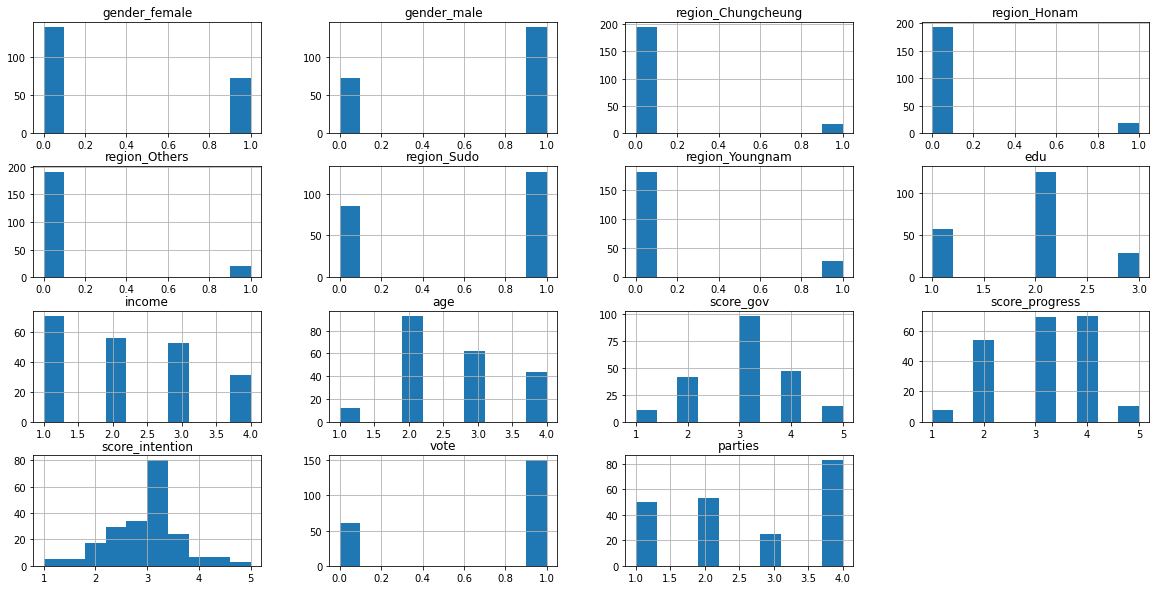

In [47]:
data.hist(figsize=(20,10))

In [48]:
X = data.loc[:,'gender_female':'score_intention']
y= data[['vote']]
X.shape, y.shape

((211, 13), (211, 1))

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)

y_train.mean(),y_test.mean()

(vote    0.708861
 dtype: float64,
 vote    0.716981
 dtype: float64)

#####
스케일링

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_MM = scaler.transform(X_train)
X_test_MM = scaler.transform(X_test)

In [51]:
pd.DataFrame(X_train_MM).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.322785,0.677215,0.094937,0.056962,0.101266,0.601266,0.145570,0.436709,0.392405,0.554852,0.507911,0.518987,0.477532
std,0.469028,0.469028,0.294060,0.232507,0.302640,0.491195,0.353796,0.312857,0.355960,0.295306,0.235099,0.245248,0.187215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.312500,0.250000,0.350000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.333333,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.666667,0.666667,0.750000,0.750000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
pd.DataFrame(X_test_MM).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.396226,0.603774,0.037736,0.188679,0.075472,0.584906,0.113208,0.424528,0.433962,0.540881,0.533019,0.537736,0.478302
std,0.493793,0.493793,0.192380,0.394998,0.266679,0.497454,0.319878,0.316170,0.355572,0.279089,0.240381,0.226789,0.163939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.500000,0.500000,0.350000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.333333,0.666667,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.666667,0.666667,0.750000,0.750000,0.550000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.900000


In [53]:
from sklearn.preprocessing import StandardScaler
scaler_s = StandardScaler()
scaler_s.fit(X_train)
X_train_S = scaler_s.transform(X_train)
X_test_S = scaler_s.transform(X_test)

####
모델학습

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [55]:
model.fit(X_train_MM,y_train)
pred_train = model.predict(X_train_MM)
model.score(X_train_MM,y_train)

0.7278481012658228

In [56]:
pred_test = model.predict(X_test_MM)
model.score(X_test_MM,y_test)

0.7169811320754716

In [57]:
from sklearn.metrics import confusion_matrix
cofusion_train = confusion_matrix(y_train,pred_train)
cofusion_train # 투표 안한 인원 46명 중 9명 맞춤

array([[  9,  37],
       [  6, 106]], dtype=int64)

In [58]:
cofusion_test = confusion_matrix(y_test,pred_test)
cofusion_test # 투표 안한 인원 16명 중 2명 맞춤

array([[ 2, 13],
       [ 2, 36]], dtype=int64)

In [59]:
# standard
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_S,y_train)
pred_train_S = model.predict(X_train_S)
model.score(X_train_S,y_train)


0.740506329113924

In [60]:
pred_test_S = model.predict(X_test_S)
model.score(X_test_S,y_test)

0.6792452830188679

In [61]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train, pred_train_S)
confusion

array([[ 12,  34],
       [  7, 105]], dtype=int64)

In [62]:
confusion_test = confusion_matrix(y_test, pred_test_S)
confusion_test

array([[ 3, 12],
       [ 5, 33]], dtype=int64)

##
### 4. 모델훈련과 세부 튜닝

In [63]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
data = pd.read_csv('C:\\Users\\user\\빅분기 실기\\[1]BigData_data_최종본(0910)\\Fvote.csv',encoding='utf-8')

In [64]:
X = data.iloc[:,:13]
y = data[['vote']]

In [65]:
data.shape, X.shape, y.shape

((211, 15), (211, 13), (211, 1))

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=42,stratify=y)

- GRID SEARCH

분석자가 하이퍼파라미터의 특정값을 지정하고 각각 모델에 적용하여 모델 적합도를 비교
1. 먼저 parameter를 지정 param_gird= {'C':[0.01,0.1,1,10,100]}
2. 모델을 불러온다
3. grid_search =GridSearchCV(알고리즘모델, param_grid, cv= 갯수 , return_train_score=True of False 정확도 결과 제시) 
4. grid_search.fit(X_train,y_train)
5. grid_search.best_params_ 와 grid_search.best_score_를 확인 

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {'C':[0.01,0.1,1,10,100]}
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=0)

In [68]:
print('best_params:{} best_score:{}'.format( grid_search.best_params_ , grid_search.best_score_))

best_params:{'C': 10} best_score:0.7274193548387096


In [69]:
grid_search.score(X_test, y_test)

0.6792452830188679

In [70]:
result_grid = pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006130,0.004827,0.000816,0.000410,0.01,{'C': 0.01},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,4,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
1,0.008158,0.005220,0.001069,0.000138,0.1,{'C': 0.1},0.71875,0.71875,0.71875,0.677419,...,0.721573,0.030797,2,0.730159,0.738095,0.738095,0.740157,0.708661,0.731034,0.011698
2,0.005548,0.002012,0.000598,0.000489,1,{'C': 1},0.71875,0.68750,0.81250,0.580645,...,0.721169,0.085441,3,0.738095,0.785714,0.730159,0.763780,0.724409,0.748431,0.022993
3,0.007822,0.009333,0.000215,0.000430,10,{'C': 10},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
4,0.011370,0.007565,0.000417,0.000511,100,{'C': 100},NaN,0.68750,0.81250,0.580645,...,NaN,NaN,5,NaN,0.769841,0.730159,0.771654,0.724409,NaN,NaN


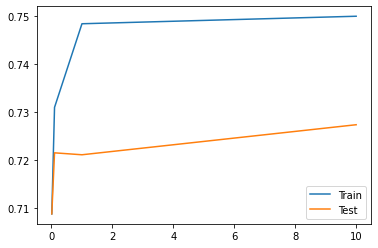

In [71]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'],result_grid['mean_train_score'],label= 'Train')
plt.plot(result_grid['param_C'],result_grid['mean_test_score'],label= 'Test')
plt.legend(loc='best')

- RandomizedSearch

In [72]:
# 랜덤서치를 위한 라이브러리 및 탐색 하이퍼파라미터 설정
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs={'C': randint(low=0.001, high=100)}
# LogisticRegression 알고리즘 적용
from sklearn.linear_model import LogisticRegression

In [73]:
# 랜덤서치를 로지스틱 모델에 적용하여 훈련데이터 학습
# 교차검증(cv) 5 설정, 훈련데이터 정확도 결과 제시하기(True)
random_search=RandomizedSearchCV(LogisticRegression(), 
                                 param_distributions=param_distribs, cv=5,
                                 # n_iter=100, 랜덤횟수 디폴트=10
                                return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F208DB7D00>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

In [74]:
# 정확도가 가장 높은 하이퍼파라미터(C) 및 정확도 제시
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Parameter: {'C': 2}
Best Cross-validity Score: 0.727


In [75]:
# 테스트 데이터에 최적 텀색 하이퍼 파라미터 적용 정확도 결과
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.679


In [76]:
# 랜덤서치 하이퍼파라미터별 상세 결과값
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010990,0.005389,0.000799,0.000399,2,{'C': 2},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.738095,0.761905,0.730159,0.779528,0.724409,0.746819,0.020752
1,0.015452,0.019675,0.003132,0.006264,97,{'C': 97},NaN,0.6875,0.8125,0.580645,...,NaN,NaN,8,NaN,0.769841,0.730159,0.771654,NaN,NaN,NaN
2,0.007595,0.007310,0.000000,0.000000,80,{'C': 80},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
3,0.007488,0.009353,0.003370,0.006252,21,{'C': 21},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
4,0.008548,0.004663,0.000599,0.000489,9,{'C': 9},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
5,0.009416,0.007688,0.000000,0.000000,13,{'C': 13},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
6,0.006851,0.008444,0.000000,0.000000,68,{'C': 68},NaN,NaN,0.8125,0.580645,...,NaN,NaN,9,NaN,NaN,0.730159,0.771654,0.724409,NaN,NaN
7,0.009374,0.007654,0.000000,0.000000,33,{'C': 33},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
8,0.014645,0.004546,0.000199,0.000398,87,{'C': 87},0.75,0.6875,0.8125,0.580645,...,NaN,NaN,10,0.746032,0.769841,0.730159,0.771654,NaN,NaN,NaN
9,0.007740,0.001118,0.000812,0.000383,2,{'C': 2},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.738095,0.761905,0.730159,0.779528,0.724409,0.746819,0.020752


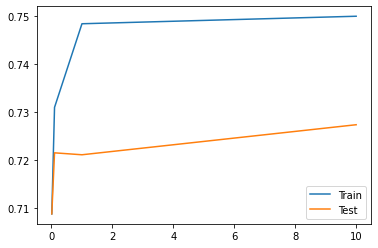

In [77]:
# 하이퍼파리미터(C)값에 따른 훈련데이터와 테스트데이터의 정확도(accuracy) 그래프
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()

##
### 5. 모델평가

In [78]:
# 모델탐색 결과, 최적의 하이퍼파리미터 결정 및 적용 (예: C=10)
Final_model=LogisticRegression(C=10)
Final_model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
pred_train = Final_model.predict(X_train)
Final_model.score(X_train, y_train)

0.740506329113924

In [80]:
pred_test = Final_model.predict(X_test)
Final_model.score(X_test, y_test)

0.6792452830188679

In [81]:
# 훈련데이터의 혼동행렬 
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[ 12  34]
 [  7 105]]


In [82]:
# 훈련데이터의 분류 모델 평가 결과
from sklearn.metrics import classification_report
cfreport_train=classification_report(y_train, pred_train)
print("분류예측 레포트:\n", cfreport_train)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.63      0.26      0.37        46
           1       0.76      0.94      0.84       112

    accuracy                           0.74       158
   macro avg       0.69      0.60      0.60       158
weighted avg       0.72      0.74      0.70       158



In [83]:
# 테스트데이터의 정확도(accuracy) 결과
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[ 3 12]
 [ 5 33]]


In [84]:
cfreport_test = classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport_test)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.38      0.20      0.26        15
           1       0.73      0.87      0.80        38

    accuracy                           0.68        53
   macro avg       0.55      0.53      0.53        53
weighted avg       0.63      0.68      0.64        53



In [85]:
# ROC 계산을 위한 라이브러리 및 산출식
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Final_model.decision_function(X_test))
roc_auc = metrics.roc_auc_score(y_test, Final_model.decision_function(X_test))
roc_auc


0.6350877192982456

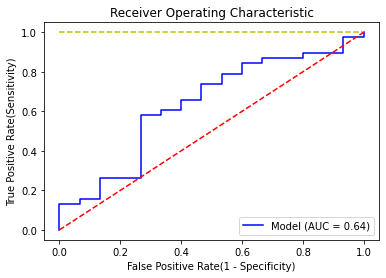

In [86]:
# ROC Curve 작성
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

##
### 6. 다중분류

In [1]:
# 분석 데이터 불러오기
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
data = pd.read_csv("C:\\Users\\user\\빅분기 실기\\[1]BigData_data_최종본(0910)\\Fvote.csv", encoding='utf-8')

In [2]:
# 특성치와 레이블 데이터셋 구분
X=data[data.columns[0:13]]
y=data[['parties']]

In [3]:
# 훈련 데이터, 테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42 )

In [4]:
y_train

,parties
37,4
63,4
132,2
87,4
23,4
...,...
139,2
20,2
143,4
115,4


In [5]:
# ML 알고리즘 모듈 불러오기 및 학습데이터에 적용(LogisticRegression)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='newton-cg') #'liblinear', 'newton-cg', 'lbfgs' 멀티클래스 분류 / 'sag', 'saga' 확률적경사기법 대용량 데이터
model.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [6]:
pred_train= model.predict(X_train)
model.score(X_train, y_train)

0.6012658227848101

In [7]:
pred_test= model.predict(X_test)
model.score(X_test, y_test)

0.5471698113207547

In [8]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,pred_train)
for i in range(len(confusion)) :
    print(confusion[i],confusion[i][i]/confusion[i].sum())

[19  2  3 13] 0.5135135135135135
[ 1 25  2 12] 0.625
[6 2 5 6] 0.2631578947368421
[ 7  8  1 46] 0.7419354838709677


In [9]:
confusion_test= confusion_matrix(y_test,pred_test)
for i in range(len(confusion_test)) :
    print(confusion_test[i],confusion_test[i][i]/confusion_test[i].sum())

[7 2 1 3] 0.5384615384615384
[1 9 1 2] 0.6923076923076923
[1 2 1 2] 0.16666666666666666
[ 2  5  2 12] 0.5714285714285714


## 하이퍼 파라미터 서치

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001, 0.01,0.1,1,10,100]}
grid_search =GridSearchCV( LogisticRegression(solver='newton-cg'), param_grid,cv=5,return_train_score=True )
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='newton-cg'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [13]:
# 정확도가 가장 높은 하이퍼파라미터(C) 및 정확도 제시
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Parameter: {'C': 0.1}
Best Cross-validity Score: 0.556


In [14]:
# 테스트 데이터에 적용(C=10), 정확도 결과
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.547


In [15]:
# 랜덤서치를 위한 라이브러리 및 탐색 하이퍼파라미터 설정
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs={'C': randint(low=0.001, high=100)}

In [16]:
# 랜덤서치를 로지스틱 모델에 적용하여 훈련데이터 학습
# 교차검증(cv) 5 설정, 훈련데이터 정확도 결과 제시하기(True)
random_search=RandomizedSearchCV(LogisticRegression(solver='newton-cg'), 
                                 param_distributions=param_distribs, cv=5,
                                 n_iter=100,
                                return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(solver='newton-cg'),
                   n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000229FCFEB820>},
                   return_train_score=True)

In [17]:
# 정확도가 가장 높은 하이퍼파라미터(C) 및 정확도 제시
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Parameter: {'C': 2}
Best Cross-validity Score: 0.544


In [18]:
# 테스트 데이터에 최적 텀색 하이퍼 파라미터 적용 정확도 결과
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.509


혼자 검증

In [31]:
best_model=LogisticRegression(C=0.1, solver='newton-cg') #'liblinear', 'newton-cg', 'lbfgs' 멀티클래스 분류 / 'sag', 'saga' 확률적경사기법 대용량 데이터
best_model.fit(X_train, y_train)
pred_train_b= best_model.predict(X_train)
best_model.score(X_train, y_train)

0.6075949367088608

In [32]:
pred_test_b= best_model.predict(X_test)
best_model.score(X_test, y_test)

0.5471698113207547

In [33]:
confusion_b = confusion_matrix(y_train,pred_train_b)
for i in range(len(confusion_b)) :
    print(confusion_b[i],confusion_b[i][i]/confusion_b[i].sum())

[20  2  1 14] 0.5405405405405406
[ 1 25  2 12] 0.625
[6 2 4 7] 0.21052631578947367
[ 6  8  1 47] 0.7580645161290323


In [34]:
confusion_test_b= confusion_matrix(y_test,pred_test_b)
for i in range(len(confusion_test_b)) :
    print(confusion_test_b[i],confusion_test_b[i][i]/confusion_test_b[i].sum())

[7 1 0 5] 0.5384615384615384
[1 8 1 3] 0.6153846153846154
[0 1 1 4] 0.16666666666666666
[ 2  4  2 13] 0.6190476190476191


[19  2  3 13] 0.5135135135135135
[ 1 25  2 12] 0.625
[6 2 5 6] 0.2631578947368421
[ 7  8  1 46] 0.7419354838709677


[7 2 1 3] 0.5384615384615384
[1 9 1 2] 0.6923076923076923
[1 2 1 2] 0.16666666666666666
[ 2  5  2 12] 0.5714285714285714